In [135]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
churn_df = pd.read_csv('hackathon_data/trunc_churn.csv')
members_df = pd.read_csv('hackathon_data/trunc_members.csv')
transact_df = pd.read_csv('hackathon_data/trunc_transaction.csv')
users_df = pd.read_csv('hackathon_data/trunc_users.csv')

In [48]:
churn_df.head()

,msno,is_churn
0,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0
1,+99fNJ7lwiWtspk9jUy2jSEwbB9AaFOGWzR47RZtv9U=,0
2,hKKm8hMOfJdsSWB0MY0GYD2d8rjrjJYbN/vAfXrmxb8=,0
3,0GDIiFKxkTPgtTtpMBM/pMC8UL5gcY3yn0Fk5X1XLis=,0
4,R4CKZzUox0f8NyUbRfzws2fXIjM3V/i4q8COoBbSeSI=,0


In [20]:
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=,4,30,male,9,20110916
1,oQCja0OLsoCRoltknOOcdk99Eb+GzOU3ck9Rkhk8ixY=,1,0,NaN,7,20170101
2,14UsNUmAV8hPhH20iItmTwdj4WuPdSgl+IFxxYv2UAs=,13,26,female,9,20060904
3,U1sC/tbHj1wxzTlS1MSkkNebBe+1Tl1D7EQD2a1eohU=,4,28,female,9,20061107
4,UlMtrW+Fd1orwHKvujHcuLE7al80WF4Bw8C9ypL19HA=,13,35,female,9,20061120


In [51]:
transact_df.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,+vT9Q27OExl3SBsFN6c4qUu4JvqCpRMh8bCYTXr79xk=,41,30,99,99,1,20170312,20170412,0
1,/CQ/QEofoZl1RDyTxTiiqEPkyndOB8jmrVcfPWl3fSM=,39,30,149,149,1,20170331,20170512,0
2,/PhaKznHrHOIGcb+hrYFfjjHeyLelfWejGDbbaGpruQ=,41,30,99,99,1,20170305,20170404,0
3,/WNj5NAZ74mcdDcTVTjnshGiJbheNdHmoAzew/7AUQc=,41,30,149,149,1,20170331,20170430,0
4,0vd9MiumUNHgTbRS1KIHA+EivDkWZifAijU+ANsLwtI=,41,30,149,149,1,20170326,20170426,0


In [13]:
users_df.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,HlAmwB3IHrDG4ViLtgggCLZOodjpFxLRTFIide0Q0RI=,20170318,44,1,0,2,52,90,13119.719
1,xZmokPACIvbzXoCrwp+nxnB3SLiLLT+QnFy6ZOYofLE=,20170318,0,1,0,0,22,3,4194.039
2,pPqWvqnGC8h3FV6370ZxYp7uXKK2b5cka2YtDJxxLJ4=,20170313,1,1,1,1,190,163,42843.440
3,jh5kzIBBC08MzHTEdiKs7v+EUYJEQvGc8cD4hNeriFQ=,20170326,9,6,3,0,49,29,14877.251
4,0LsJiAOivwsbXT5bT4RYjWQdPOmsPPJbQtSAPtNgnBM=,20170327,18,2,1,5,112,129,27387.476


In [18]:
# missing values for gender in members_df. no other missing values

members_df['gender'].isna().sum() #LOTS of missing values.

9652

In [23]:
(transact_df['plan_list_price'] - transact_df['actual_amount_paid']).value_counts()
#very few people pay some other than the plan list price

 0      23361
 30        80
 180       63
-149       30
 149       22
 50        13
-119        8
 20         7
-129        2
 120        2
dtype: int64

In [24]:
transact_df['is_auto_renew'].value_counts() #most user auto-renew

1    21636
0     1952
Name: is_auto_renew, dtype: int64

In [28]:
ages = members_df['bd']
ages[(ages < 100) & (ages > 15)]

0        30
2        26
3        28
4        35
5        23
         ..
17650    28
17653    25
17654    23
17657    25
17658    33
Name: bd, Length: 7940, dtype: int64

In [45]:
common_plans = transact_df['plan_list_price'].value_counts().index[:5]

In [54]:
plan_vs_churn = pd.merge(transact_df, churn_df, on = 'msno', how = 'inner')
plan_vs_churn = plan_vs_churn[plan_vs_churn['plan_list_price'].isin(common_plans)]
plan_vs_churn = plan_vs_churn[['plan_list_price', 'is_churn']]

In [58]:
plan_vs_churn.groupby('plan_list_price')['is_churn'].mean()

#lower prices give lower churn rates, in general.

plan_list_price
99     0.044168
100    0.027656
129    0.162218
149    0.099610
180    0.107254
Name: is_churn, dtype: float64

149     11796
99       7630
180      1930
129       974
100       687
0         115
1788       85
894        68
536        52
1200       49
300        41
150        31
477        22
447        19
480        15
298        12
600        12
1599       11
119        11
120         6
35          5
930         4
500         3
799         2
450         2
400         2
1299        1
131         1
1000        1
350         1
Name: plan_list_price, dtype: int64

In [64]:
transact_df[['payment_plan_days', 'plan_list_price']].groupby(['payment_plan_days', 'plan_list_price']).size()

payment_plan_days  plan_list_price
0                  0                     40
1                  0                      3
7                  0                     25
                   35                     5
14                 0                      1
30                 0                      1
                   99                  7630
                   100                  687
                   119                   11
                   120                    6
                   129                  974
                   131                    1
                   149                11796
                   150                   31
                   180                 1930
60                 0                     20
                   300                   16
70                 350                    1
80                 400                    2
90                 298                   12
                   300                   25
                   447                   

In [65]:
days_vs_churn = pd.merge(transact_df, churn_df, on = 'msno', how = 'inner')
days_vs_churn.groupby('payment_plan_days')['is_churn'].mean()

#very high churn rates for every payment plan length except 0 (whatever 0 means) and 30. nearly all users have 30-day
#plans (97.79%)

payment_plan_days
0      0.175000
1      1.000000
7      0.800000
14     1.000000
30     0.082672
60     0.722222
70     1.000000
80     1.000000
90     0.894737
100    1.000000
110    1.000000
120    1.000000
180    0.968254
195    1.000000
200    1.000000
240    1.000000
360    1.000000
365    1.000000
395    1.000000
400    1.000000
410    1.000000
415    1.000000
450    1.000000
Name: is_churn, dtype: float64

In [67]:
(transact_df['payment_plan_days']==30).mean()

0.9779124978802781

In [68]:
col_list = [(members_df,'registration_init_time'), (transact_df,'transaction_date'),
            (transact_df,'membership_expire_date'),(users_df,'date')]

for df, col in col_list:
    df[col] = pd.to_datetime(df[col],format='%Y%m%d')

In [72]:
transact_df['transaction_year'] = transact_df['transaction_date'].apply(lambda date: date.year)

In [78]:
transact_df.groupby(['transaction_year', 'payment_plan_days']).size()

transaction_year  payment_plan_days
2015              0                       40
                  30                    1529
2016              7                        2
                  30                     191
                  60                       1
                  90                       2
                  110                      1
                  120                      3
                  195                      1
                  360                      1
                  395                      4
                  410                      2
                  415                      1
2017              1                        3
                  7                       28
                  14                       1
                  30                   21347
                  60                      35
                  70                       1
                  80                       2
                  90                      74
                  1

In [79]:
year_vs_churn = pd.merge(transact_df, churn_df, on = 'msno', how = 'inner')
year_vs_churn.groupby('transaction_year')['is_churn'].mean()

transaction_year
2015    0.256851
2016    0.870813
2017    0.081797
Name: is_churn, dtype: float64

In [80]:
auto_vs_churn = pd.merge(transact_df, churn_df, on = 'msno', how = 'inner')
auto_vs_churn.groupby('is_auto_renew')['is_churn'].mean()

# customers more likely to churn if they do not auto-renew

is_auto_renew
0    0.365266
1    0.076539
Name: is_churn, dtype: float64

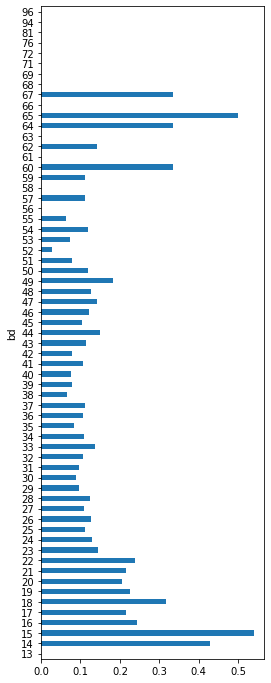

In [97]:
age_vs_churn = pd.merge(members_df, churn_df, on = 'msno', how = 'inner')
age_vs_churn = age_vs_churn[(age_vs_churn['bd'] < 100) & (age_vs_churn['bd'] > 12)]
age_vs_churn.groupby('bd')['is_churn'].mean().plot(kind = 'barh',
                                                   figsize = (4,12))

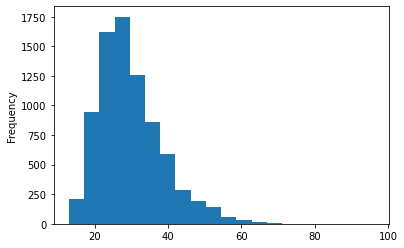

In [105]:
age_vs_churn['bd'].plot.hist(bins = 20) #most users in late teens to late thirties

In [106]:
transact_df['plan_list_price'][transact_df['plan_list_price'] == 0]

43       0
219      0
350      0
463      0
550      0
        ..
21744    0
22199    0
22381    0
22567    0
22961    0
Name: plan_list_price, Length: 115, dtype: int64

# USING MERGED DATA

In [115]:
Data = pd.read_csv('Data.csv')

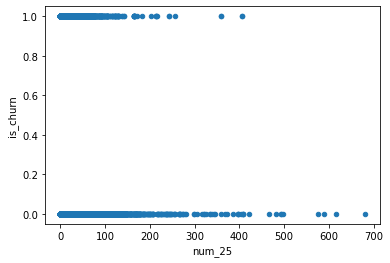

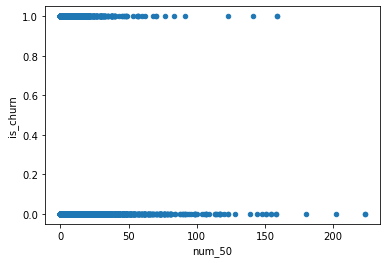

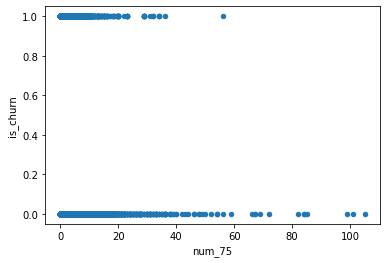

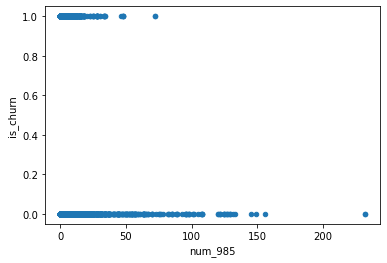

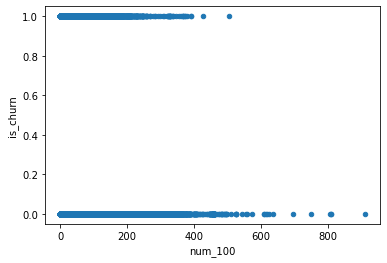

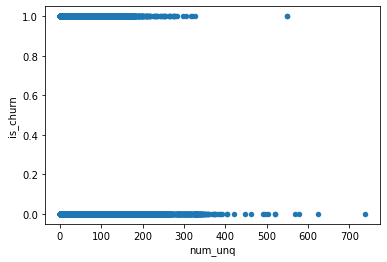

In [116]:
for x in ['num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq']:
    Data.plot(kind = 'scatter', x = x, y = 'is_churn')
    
#users who listen to songs longer are less likely to churn?

In [126]:
listens_df = Data[['num_25', 'num_50', 'num_75', 'num_985', 'num_100']].copy()
plays_majority = pd.Series([])
for index in Data.index:
    listens = [(col, listens_df.loc[index, col]) for col in listens_df.columns]
    listens = sorted(listens, key = lambda x: x[1])
    plays_majority[index] = listens[0][0]

<ipython-input-126-8dcac83333f2>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  plays_majority = pd.Series([])


In [128]:
Data['plays_majority'] = plays_majority

In [129]:
Data.groupby(plays_majority)['is_churn'].mean()

num_100    0.080732
num_25     0.082830
num_50     0.088595
num_75     0.096392
num_985    0.097655
Name: is_churn, dtype: float64

In [130]:
plays_majority.value_counts()

num_50     121688
num_25      96547
num_75      75546
num_985     41237
num_100       929
dtype: int64

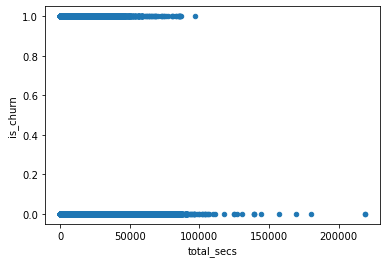

In [132]:
Data.plot.scatter(x = 'total_secs', y = 'is_churn')

(13.0, 99.0)

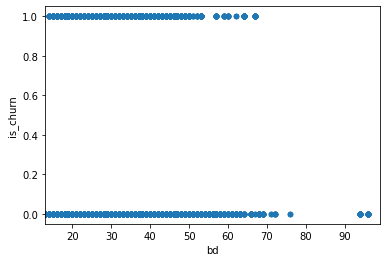

In [136]:
Data.plot.scatter(x = 'bd', y = 'is_churn')
plt.xlim(13,99)

In [137]:
Data.groupby('is_cancel')['is_churn'].mean()

#people who have canceled are, unsurprisingly, 4x more likely to churn

is_cancel
0    0.084370
1    0.343154
Name: is_churn, dtype: float64

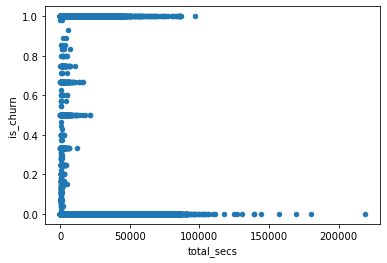

In [141]:
Data.groupby('total_secs')['is_churn'].mean().reset_index().plot.scatter(x = 'total_secs', y = 'is_churn')

In [142]:
col_list = ['registration_init_time', 'transaction_date',
            'membership_expire_date', 'date']

In [143]:
for name in col_list:
    Data[name] = pd.to_datetime(df[col],format='%Y%m%d')

In [153]:
print(members_df['registration_init_time'].min(), members_df['registration_init_time'].max())

2004-03-26 00:00:00 2017-03-24 00:00:00


In [157]:
Data.groupby('registered_via')['is_churn'].agg(['size', 'mean'])

,size,mean
registered_via,,
3,49515,0.126386
4,22359,0.177110
7,158292,0.052593
9,104585,0.111096
13,1196,0.000000


In [163]:
Data['age_bin'] = (5 + Data['bd'].copy()).round(-1)

In [167]:
Data_binned = Data[Data['age_bin'].isin(np.arange(2,11)*10)].copy()

In [173]:
xx = Data_binned.groupby(['age_bin', 'is_auto_renew'])[['is_churn']].agg(['size', 'mean'])

In [188]:
xx = xx.reset_index()
xx.columns = ['age_bin', 'is_auto_renew', 'size', 'churn_likelihood']

In [190]:
xx

,age_bin,is_auto_renew,size,churn_likelihood
0,20,0,9771,0.350834
1,20,1,9932,0.060411
2,30,0,14118,0.365987
3,30,1,75677,0.059120
4,40,0,3857,0.471869
5,40,1,49563,0.063959
6,50,0,791,0.651075
7,50,1,11848,0.069970
8,60,0,225,0.337778
9,60,1,4294,0.019096


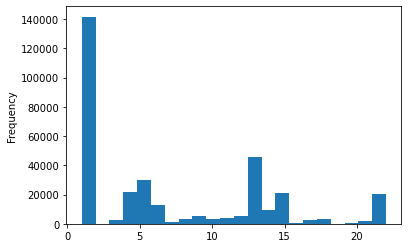

In [197]:
Data['city'].plot.hist(bins = 22)

In [233]:
1-Data.groupby('city')['is_churn'].mean().sort_values(ascending = True)

#percentage who have not churned in last pay period by city

city
20    1.000000
16    1.000000
7     0.985523
3     0.937179
17    0.932878
10    0.931295
1     0.931238
15    0.924838
8     0.915286
22    0.913448
14    0.908443
4     0.903877
11    0.898126
13    0.889217
6     0.882565
5     0.882158
21    0.879444
12    0.850913
18    0.840099
9     0.764275
Name: is_churn, dtype: float64

In [209]:
pct = Data.groupby('city')['is_churn'].mean() #percent that churn by city
raw = Data.groupby('city')['is_churn'].size() #number in each city

In [210]:
(pct*raw).sort_values(ascending = False)

city
1     9740.0
13    5028.0
5     3517.0
4     2090.0
22    1741.0
15    1592.0
6     1531.0
9     1222.0
14     848.0
12     776.0
18     579.0
11     435.0
8      271.0
21     234.0
10     209.0
17     177.0
3      159.0
7       13.0
16       0.0
20       0.0
Name: is_churn, dtype: float64

In [211]:
((1-pct)*raw).sort_values(ascending = False) #number of return customers by city

city
1     131907.0
13     40358.0
5      26328.0
4      19653.0
15     19589.0
22     18374.0
6      11506.0
14      8414.0
12      4429.0
9       3962.0
11      3835.0
18      3042.0
8       2928.0
10      2833.0
17      2460.0
3       2372.0
21      1707.0
7        885.0
20       801.0
16       402.0
Name: is_churn, dtype: float64

In [239]:
Data_binned.groupby('city')['bd'].agg(['size', 'mean']).sort_values(by = 'size', ascending = False)

,size,mean
city,,
13,40908,30.061651
5,27058,30.735346
4,19713,27.984173
15,18842,28.687878
22,18341,29.023336
6,11312,29.339905
14,8485,30.187861
1,5211,27.170984
12,4716,27.126378


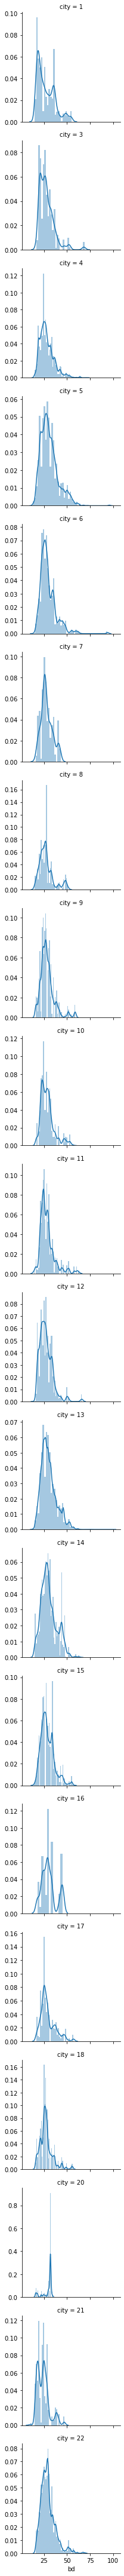

In [235]:
import seaborn as sns

sns.FacetGrid(Data_binned, row = 'city', sharey = False).map(sns.distplot, 'bd')

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,...,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,plays_majority,age_bin
0,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,2017-03-18,39,30,149,...,2017-03-18,0,1,0,0,38,39,9616.313,num_25,30
1,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,2017-03-18,39,30,149,...,2017-03-18,3,1,0,0,26,27,5963.866,num_75,30
2,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,2017-03-13,39,30,149,...,2017-03-13,0,0,0,0,4,4,978.785,num_25,30
3,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,2017-03-26,39,30,149,...,2017-03-26,1,1,0,0,30,32,7583.396,num_75,30
4,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,2017-03-27,39,30,149,...,2017-03-27,0,0,1,1,20,22,4885.992,num_25,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335917,SQmLpJbkZiRINbPUkiXH6P4/3GwkVv9H7EHbpn0e8Z4=,0,13,33,male,3,NaT,39,30,149,...,NaT,11,1,1,2,40,42,11368.180,num_50,40
335918,SQmLpJbkZiRINbPUkiXH6P4/3GwkVv9H7EHbpn0e8Z4=,0,13,33,male,3,NaT,39,30,149,...,NaT,4,1,1,1,35,39,9240.199,num_50,40
335919,SQmLpJbkZiRINbPUkiXH6P4/3GwkVv9H7EHbpn0e8Z4=,0,13,33,male,3,NaT,39,30,149,...,NaT,0,0,1,0,6,5,1675.688,num_25,40
335920,SQmLpJbkZiRINbPUkiXH6P4/3GwkVv9H7EHbpn0e8Z4=,0,13,33,male,3,NaT,39,30,149,...,NaT,2,0,0,0,13,15,3381.208,num_50,40


In [231]:
Data_binned.groupby('city')['bd'].agg(['mean', 'size'])

,mean,size
city,,
1,27.170984,5211
3,27.880000,2225
4,27.984173,19713
5,30.735346,27058
6,29.339905,11312
7,27.995068,811
8,27.427012,2932
9,28.448401,4690
10,28.568736,2706


In [241]:
Data['bd'].value_counts()

 0      155071
 27      11993
 25      11862
 26      10645
 29      10270
         ...  
 76          4
 71          4
-46          4
 4           3
 100         2
Name: bd, Length: 72, dtype: int64

In [244]:
Data['bd'][Data['bd'] == 0].shape[0]/Data.shape[0] #percent of age column consisting of zeros

0.46159364423554905